<a href="https://colab.research.google.com/github/RobinSmits/OBSDeVelduil-AI-Demo/blob/master/AI_Demo_Computer_Vision_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI Demo - Computer Vision 'Handgeschreven cijfers herkennen'

Hoi! Welkom bij deze demo. 

In het komende uur gaan we in sneltreinvaart kijken hoe we een computer plaatjes van handgeschreven cijfers kunnen leren herkennen. 
Het leren herkennen van plaatjes door een computer wordt in de AI wereld ook wel 'Computer Vision' genoemd. Het wordt al heel lang gebruikt maar sinds 2012 gaan de ontwikkelingen enorm snel (voor de kinderen die daar wat meer over willen lezen: https://en.wikipedia.org/wiki/AlexNet)

# Wat gaan we de computer leren?

We hebben dus heel veel plaatjes met handgeschreven cijfers. We gaan deze plaatjes allemaal aan de computer laten zien en bij elk plaatje vertellen we dan welk cijfer het is.

Daarmee gaat de computer leren hoe elk cijfer eruit ziet. Als we daarna nieuwe foto's van cijfers aan de computer tonen dan gaat de computer aangeven welk cijfer hij denkt dat het is.

De plaatjes die we gaan laten zien noemen we ook wel de 'data'. De cijfers die we voor elk plaatje aan de computer vertellen noemen we ook wel de 'labels'.

Om de computer iets te leren moeten we een klein computer programma schrijven. Dit computer programma noemen we het 'model'.
Zodra we de computer daadwerkelijk gaan laten leren zijn we het 'model' aan het 'trainen'.

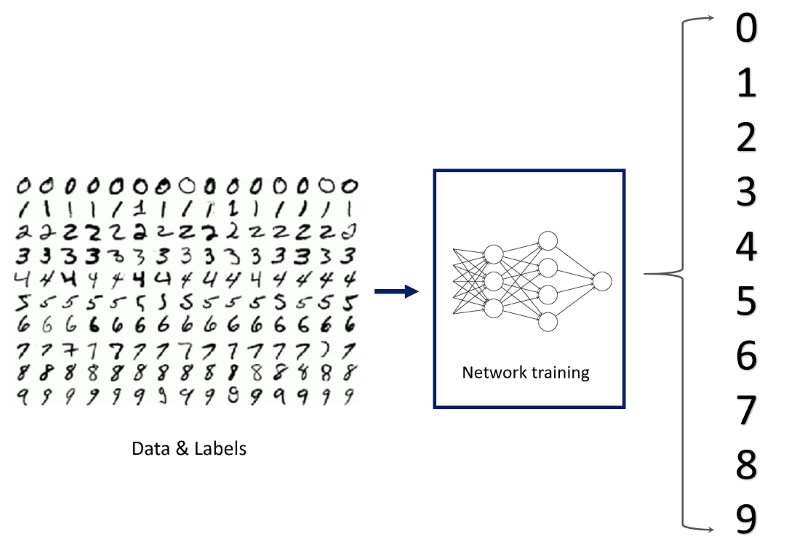

# Wat gaan we doen?

Om een computer handschrift van foto's te leren herkennen moeten we een aantal stappen doorlopen. Alle stappen hieronder worden ook door bedrijven of onderzoekers van AI toegepast... alleen vaak met veel meer data en tijd ;-)
We gaan in volgorde de volgende stappen uitvoeren:


1.   Data verzamelen (dus hoe komen we aan al die plaatjes met handschrift?)
2.   Data voorbereiden (We voeren wat technische trucjes uit wat het voor de computer makkelijker maakt om te leren)
3.   Data onderzoek (We gaan heel kort bekijken hoe onze data eruit ziet)
4.   Machine Learning Model opzetten (We gaan met een paar regels het meest simpele machine learning model opbouwen)
5.   Machine Learning model trainen (Net als jullie moet de computer ook dingen leren..dit doen we door herhaling)
6.   Machine Learning model testen (Na het trainen gaan we het model testen op foto's die het model nog nooit eerder gezien heeft.)



# De start

We gaan eerst een aantal Python programma's laden en in gebruik nemen. Deze hebben we nodig om het machine learning model op te zetten en de data te kunnen gebruiken.

In [ ]:
# Tensorflow is een Artificial Intelligence en Machine Learning programma van Google (Meer weten? https://www.tensorflow.org/learn )
import tensorflow as tf

# Numpy is een programma voor Numerieke berekeningen in Python. Oftewel..gewoon rekenen ;-)
import numpy as np

# Matplotlib is een programma om grafieken te kunnen maken en bekijken. (Meer weten? https://matplotlib.org/3.2.1/gallery/index.html)
import matplotlib.pyplot as plt
%matplotlib inline

# Data verzamelen

We gaan de computer leren om handgeschreven cijfers van kleine foto's te leren herkennen. We hebben daarvoor een grote hoeveelheid van die kleine foto's nodig en voor elke foto moeten we ook nog weten welk cijfer erop staat.

Zo'n grote hoeveelheid foto's noemen we de data of een dataset. En voor handgeschreven cijfers is er een dataset genaamd MNIST. Deze bevat een set van 60000 foto's waarmee we onze computer de cijfers mee kunnen leren herkennen. 

Deze dataset bevat ook 10000 foto's waarmee we ons model kunnen testen. Het testen van je model doe je nadat het trainen klaar is. De foto's waarmee je test mogen ook niet tijdens het trainen gebruikt zijn. Je wilt namelijk dat je model goede voorspellingen maakt op nog nooit geziene foto's.

Normaal zouden we een dataset vaak ergens moeten verzamelen of zelf samenstellen. De MNIST dataset kunnen we echter heel makkelijk gebruiken dankzij de Python programma's die we eerder ingeladen hebben.

In [ ]:
# We laden de MNIST Dataset (Meer weten? https://en.wikipedia.org/wiki/MNIST_database )
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Data voorbereiding

De dataset bevat foto's in digitale vorm. Elke foto is 28 bij 28 pixels en elke pixel heeft een waarde tussen de 0 tot 255.

Ons machine learning model leert wat beter als alle waarden van de pixels tussen de 0 en 1 liggen.

Laten we daarvoor onze data voorbereiden.

In [ ]:
# Data voorbereiding 
x_train = x_train / 255.0   # Of... x_train /= 255.0
x_test =  x_test / 255.0

# Data onderzoek

Een standaard onderdeel van het maken van een machine learning model is het onderzoeken en voorbereiden van de dataset. Er zijn onderzoeken gedaan dat tot 90% van de tijd voor het maken van een machine learning model gaat zitten in het onderzoeken en voorbereiden van de data.

Laten we onze data eens aan een klein onderzoek.

We hebben 4 onderdelen van onze dataset:

1.   x_train: Dit zijn al onze foto's om het model te trainen
2.   y_train: Dit zijn voor elke foto in x_train het exacte cijfer.
3.   x_test:  Dit zijn al onze foto's om het model te testen.
4.   y_test:  Dit zijn voor elke fote in x_test het exacte cijfer. 

Laten we eens kijken hoeveel foto's we in elke set hebben.



In [ ]:
print(f"Hoeveelheid foto's in x_train: {len(x_train)}")
print(f"Hoeveelheid foto's in x_test: {len(x_test)}")

En hetzelfde doen we voor de cijfers die bij elke foto horen.

In [ ]:
print(f"Hoeveelheid cijfers in y_train: {len(y_train)}")
print(f"Hoeveelheid cijfers in y_test: {len(y_test)}")

Laten we de eerste 3 foto's in x_train eens beter bekijken.

We kunnen eerst even kijken hoe de informatie in de dataset zit.

In [ ]:
# x_train en y_train zijn array's. Dit zijn computer objecten om grote hoeveelheden gegevens op te slaan. Ideaal dus voor foto's.
print(f"Foto's in x_train:\n{x_train[:3]}")
print(f"\nCijfers in y_train:\n{y_train[:3]}")

We zien heel veel cijfertjes. Voor elke pixel in de foto is er een cijfertje. De foto's in de MNIST dataset zijn maar 28 bij 28 pixels.

We kunnen deze cijfertjes nu ook gebruiken om de daadwerkelijke foto's te tonen. Bij elke foto tonen we ook het cijfertje erbij uit y_train. Dit cijfertje noemen we bij machine learning een 'label'

In [ ]:
fig, axes = plt.subplots(2, 5, figsize = (10, 5))
num_col = 5
for i in range(10):
    ax = axes[i // num_col, i % num_col]
    ax.imshow(x_train[i], cmap = 'gray')
    ax.set_title('Label: {}'.format(y_train[i]))

plt.tight_layout()
plt.show()

# Model Opzetten

We gaan nu een simpel model opzetten met behulp van een programma genaamd 'Tensorflow'. Met Tensorflow kun je eenvoudige modellen zoals we hierna gaan doen maken tot de meest complexe AI systemen denkbaar.

We zetten ons model op met een 'ingang' waarbij we voor elke pixel een eigen plekje reserveren. Dit levert dus 28 pixels maal 28 pixels = 784 plekjes op. Dit is onze 'eerste' laag.

Dan hebben we een 2de laag met 128 plekjes. Deze laag noemen we ook wel de verborgen laag. Het is erg complex om uit te leggen wat deze doet maar hij maakt het model slimmer waardoor we beter de cijfers leren herkennen.

En als laatste laag hebben we de uitgang. Omdat we 10 cijfers hebben zijn er 10 uitgangen. Je kan je het voorstellen dat als de computer straks bijvoorbeeld het cijfer 8 voorspeld dan gaat als het ware het lampje bij uitgang 8 branden.

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(784, activation='relu', name = 'ingang_laag'),      # Input Layer
  tf.keras.layers.Dense(128, activation='relu', name = 'verborgen_laag'),   # Hidden Layer
  tf.keras.layers.Dense(10, activation='softmax', name = 'uitgang_laag')    # Output Layer
])

We kunnen heel simpel bekijken hoe ons model er uitziet.

In [ ]:
model.summary()

# Model Trainen

We gaan nu ons model trainen door het 10 keer alle foto's te laten zien.
En we hadden 60000 foto's ... dus ons model gaat 600000 foto's bekijken.

Let zometeen op de tijd waarin dat gebeurd :-)

In [ ]:
# Deze regels zijn nodig om het model compleet te maken..
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False)
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

# We 'compileren' ==> 'gereed maken' het model met zijn optimizer, loss en metrics
model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

# Hier start we het trainen van het model...we gaan het model 10 keer alle foto's laten zien.
model.fit(x_train, y_train, epochs = 10)

We hebben nu ons model getrained. De getallen aan de rechterkant ('loss' en 'accuracy') geven aan het goed het model is getrained.

De 'loss' willen we altijd zo laag mogelijk (richting 0 krijgen) en de 'accuracy' zo hoog mogelijk (richting 1)

# Model Testen

We hebben het model nu getest en nu kunnen we gaan testen hoe goed het model werkt.

We kunnen dit doen door onze test dataset te gebruiken. We laten het model voor de 10000 test plaatjes voor elk plaatje voorspellen welk cijfer het is.
En daarbij geeft het model zelf aan hoeveel er goed waren.

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

We krijgen hierboven 2 getallen terug. De 'accuracy' geeft aan hoe goed er is voorspeld. Als we de 'accuracy' * 100 doen krijgen we ongeveer 98.0% dat goed was voorspeld. (Per training van een model kan de 'accuracy' wat verschillen)

Van de 10000 plaatjes zijn er dus ongeveer 9800 goed voorspeld en ongeveer 200 waren er fout.

Laten we nog eens enkele voorbeelden bekijken met plaatje erbij.

In [ ]:
# Voorbeeld 1
plaatje1 = x_test[0]
print(f'Cijfer: {y_test[0]}')
plt.imshow(plaatje1, cmap = 'gray')
plt.show()

# Probability - Kans: We voorspellen nu alleen dit plaatje
voorspelling1_kans = model.predict(plaatje1.reshape(-1, 28, 28))

print(f'\nDe voorspelde kansen: \n{voorspelling1_kans}')
print(f'\nHet voorspelde cijfer: \n{np.argmax(voorspelling1_kans, axis = -1)}')


In [ ]:
# Voorbeeld 2
plaatje2 = x_test[1]
print(f'Cijfer: {y_test[1]}')
plt.imshow(plaatje2, cmap = 'gray')
plt.show()

# Probability - Kans: We voorspellen nu alleen dit plaatje
voorspelling2_kans = model.predict(plaatje2.reshape(-1, 28, 28))

print(f'\nDe voorspelde kansen: \n{voorspelling2_kans}')
print(f'\nHet voorspelde cijfer: \n{np.argmax(voorspelling2_kans, axis = -1)}')

In [ ]:
# Voorbeeld 3
plaatje3 = x_test[2]
print(f'Cijfer: {y_test[2]}')
plt.imshow(plaatje3, cmap = 'gray')
plt.show()

# Probability - Kans: We voorspellen nu alleen dit plaatje
voorspelling3_kans = model.predict(plaatje3.reshape(-1, 28, 28))

print(f'\nDe voorspelde kansen: \n{voorspelling3_kans}')
print(f'\nHet voorspelde cijfer: \n{np.argmax(voorspelling3_kans, axis = -1)}')

# Meer weten?

